In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [205]:
image = cv2.imread("Data/Images/Test 2.jpg")

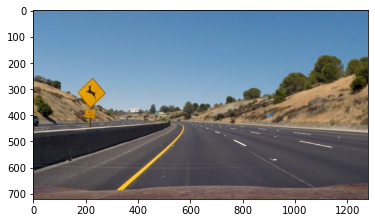

In [206]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

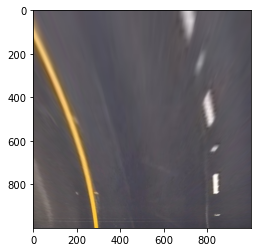

In [207]:
#Getting the appropriate Region of Interest as an Image
src_points = np.array([[0, 650], [1280, 650], [700, 450], [580, 450]]).astype(np.float32)
dst_points = np.array([[0,0], [1000, 0], [1000, 1000],  [0, 1000]]).astype(np.float32)
M = cv2.getPerspectiveTransform(src_points, dst_points)
warped = cv2.flip(cv2.warpPerspective(image, M, (1000, 1000),flags=cv2.INTER_LINEAR), 0)
plt.imshow(cv2.cvtColor(warped, cv2.COLOR_BGR2RGB))

In [208]:
warped_hsv = cv2.cvtColor(warped, cv2.COLOR_RGB2HSV)

In [209]:
h, s, v = cv2.split(warped_hsv)

In [210]:
white_mask = (s < 30) & (v > 200)
yellow_mask = (80 < h) & (h < 120) & (100 < s) & (s < 255) & (100 < v) & (v < 255) 

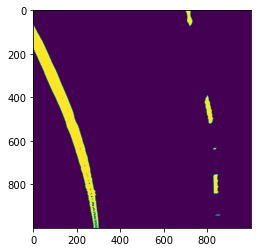

In [211]:
plt.imshow(white_mask | yellow_mask)